In [10]:
using Plots, Interpolations, Polynomials, LinearAlgebra,Statistics,DataFrames,Measures

### Zadanie 1 - Lagrange interpolation

Napisać własną implementację interpolacji wielomianowej stosując wprost wzór na wielomian interpolacyjny  Lagrange'a .  Przetestować swoją implementację na wylosowanych węzłach interpolacji w wybranym przedziale. Narysować wykres wielomianu interpolacyjnego w tym przedziale wraz z wezlami interpolacji. <b>(1 pkt)</b>

In [11]:
xs = 0:1:10
ys = [rand() for x in xs]

11-element Vector{Float64}:
 0.4871114399222445
 0.9306134610535542
 0.17475832428814897
 0.20393433169108122
 0.5200075667004235
 0.76974112005295
 0.7805486941122968
 0.3017894344859253
 0.7815266866385365
 0.16829123673785784
 0.5561777331414269

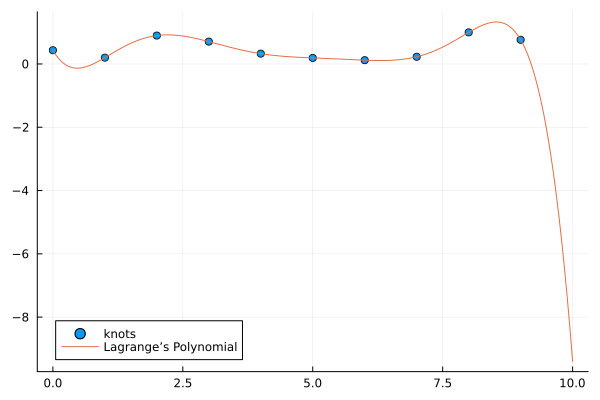

In [21]:
function LagrangeInterpolation(xs, ys, x)
    result = 0.0 
    n = length(xs) 

    for i in 1:n
        tmp = 1.0 
        for j in 1:n
            if i != j
                tmp *= (x - xs[j]) / (xs[i] - xs[j])
            end
        end
        result += tmp * ys[i]
    end 

    return result 
end

test_x = 0:0.01:10 
lagrange_interpolation = [LagrangeInterpolation(xs, ys, x) for x in test_x]

using Plots
scatter(xs, ys, label="knots")
plot!(test_x, lagrange_interpolation, label="Lagrange’s Polynomial")

### Zadanie 2 - Newton Method

Zrobic to samo dla metody  Newtona (metoda ilorazów róznicowych).Narysować wykres wielomianu interpolacyjnego otrzymanego metodą Newtona dla tych samych danych, co w poprzednim punkcie. Zadbać o to, żeby ilorazy wyliczać tylko raz dla danego zbioru wezłow interpolacji, według schematu z pakietu Interpolations http://juliamath.github.io/Interpolations.jl/stable/interpolations/ : 
   1. napisać funkcję `NewtonInterpolation`, która wylicza ilorazy różnicowe i zwraca "obiekt interpolacyjny" `newt`
   2. napisać funkcję która wylicza wartość wielomianu dla obiektu `newt` w punkcie x za pomocą  <b>schematu Hornera dla postaci Newtona </b> <b>(2 pkt)</b>

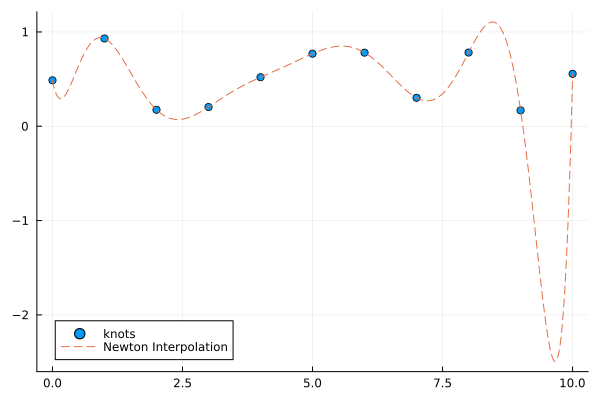

In [13]:
function NewtonInterpolation(xs, ys)
    n = length(xs)
    newt = zeros(Float64, n, n)

    for i in 1:n
        newt[i, i] = ys[i]
    end

    for len in 2:n
        for i in 1:n-len+1
            nominator = newt[i+1, i+1+len-2] - newt[i, i+len-2]
            denominator = xs[i+len-1] - xs[i]
            newt[i, i+len-1] = nominator / denominator
        end
    end

    return newt
end

function Newton(newt, xs, x)
    n = length(xs)
    result = newt[1, n]

    for i in 1:n-1
        result = newt[1, n-i] + result * (x - xs[n-i])
    end

    return result
end

newt = NewtonInterpolation(xs, ys)
newton_interpolation = [Newton(newt, xs, x) for x in test_x]

using Plots
scatter(xs, ys, label="knots")
plot!(test_x, newton_interpolation, label="Newton Interpolation", linestyle=:dash)

### Zadanie 3 - interpolation using Polynomials package

Zastosować interpolację wielomianową z pakietu Polynomials do tych samych danych, co w poprzednich punktach. Porównać wszystkie 3 wyniki interpolacji wielomianowej na jednym wykresie. Co zauważamy? Dlaczego? <b>(1 pkt)</b>

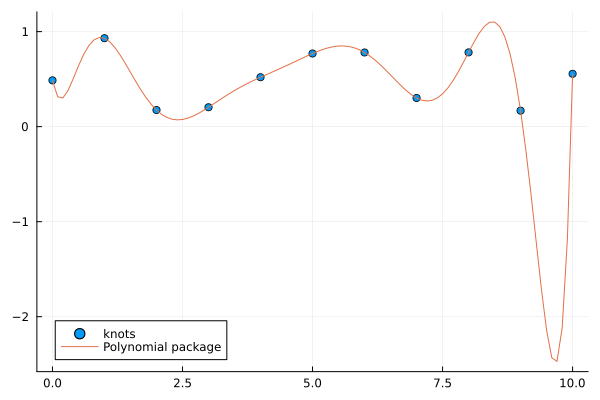

In [14]:
using Polynomials
using Plots
f=fit(xs, ys)
scatter(xs, ys, label="knots")
plot!(f,  extrema(xs)..., label="Polynomial package")

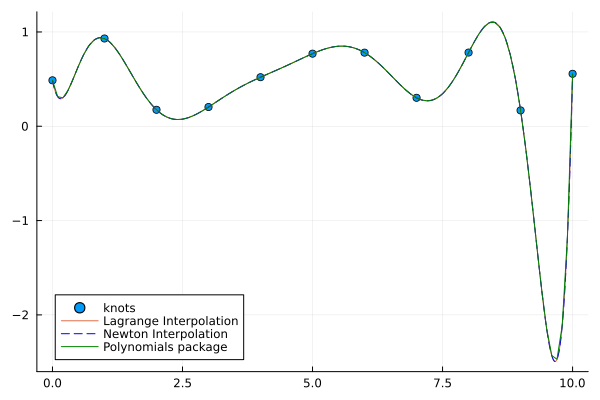

In [15]:
using Polynomials
scatter(xs, ys, label="knots")
plot!(test_x, lagrange_interpolation, label="Lagrange Interpolation")
plot!(test_x, newton_interpolation, label="Newton Interpolation", linestyle=:dash, color=:blue)
plot!(f,  extrema(xs)..., label="Polynomials package", color=:green)

Krzywe sie pokrywają, co wynika z twierdzenia że istenieje tylko jeden wielomian n-tego stopnia przechodzący przez n+1 punktów.

### Zadanie 4 - Time test 

Porównać metody poprzez pomiar czasu wykonania dla zmiennej ilości węzłow interpolacji. Uwaga: dodatkowo, dla metody Newtona i pakietu Polynomials należy osobno zmierzyć czas wyliczania wielomianu i osobno czas wyliczania wartości w punkcie. Dokonać pomiaru 10 razy i policzyć wartość średnią oraz oszacować błąd pomiaru za pomocą odchylenia standardowego; wyniki przedstawić na wykresach. <b>(2 pkt)</b>

In [16]:
function get_random_knots(n)
    xs = [i for i in 0:n-1] 
    ys = rand(n)

    return xs, ys
end

get_random_knots (generic function with 1 method)

In [17]:
function lagrange_test(xs,ys,test_x)
    return  sum([@elapsed LagrangeInterpolation(xs, ys, x) for x in test_x])
end

lagrange_test (generic function with 1 method)

In [18]:
function newton_test(xs,ys,test_x)
    newt, time_p = NewtonInterpolation(xs,ys), @elapsed NewtonInterpolation(xs,ys)
    time = sum([@elapsed Newton(newt, xs, x) for x in test_x])
    return time + time_p
end

newton_test (generic function with 1 method)

In [22]:
function package_test(xs,ys,test_x)
    f, time_f = fit(xs,ys), @elapsed fit(xs,ys)
    time = sum([@elapsed f(x) for x in test_x])
    return time + time_f
end

package_test (generic function with 1 method)

In [28]:
using DataFrames
df = DataFrame(size = Int64[], interpolation = String[], time = Float64[])

for n in 10:10:100
    xs,ys = get_random_knots(n)
    test_x = 0:0.1:n 
    for i in 1:11
        if i!=1
            push!(df, [n "l" lagrange_test(xs,ys,test_x)])
            push!(df, [n "n" newton_test(xs,ys,test_x)])
            push!(df, [n "p" package_test(xs,ys,test_x)])
        end
    end    
end 

df

Row,size,interpolation,time
,Int64,String,Float64
1,10,l,1.49e-5
2,10,n,3.8e-6
3,10,p,4.5e-6
4,10,l,1.45e-5
5,10,n,4.3e-6
6,10,p,3.9e-6
7,10,l,1.47e-5
8,10,n,3.2e-6
9,10,p,4.1e-6


In [29]:
df_grouped = groupby(df, [:size, :interpolation])

Row,size,interpolation,time
,Int64,String,Float64
1,10,l,1.49e-5
2,10,l,1.45e-5
3,10,l,1.47e-5
4,10,l,1.45e-5
5,10,l,1.45e-5
6,10,l,1.44e-5
7,10,l,1.46e-5
8,10,l,1.43e-5
9,10,l,1.42e-5


In [91]:
using Statistics

stats = combine(df_grouped, "time" => mean, "time" => std)

Row,size,interpolation,time_mean,time_std
,Int64,String,Float64,Float64
1,10,l,1.449e-5,2.079e-7
2,10,n,3.55e-6,3.77859e-7
3,10,p,4.18e-6,3.11983e-7
4,20,l,0.00010131,2.88483e-7
5,20,n,9.24e-6,4.03958e-6
6,20,p,9.74e-6,4.11501e-7
7,30,l,0.00033718,1.55263e-6
8,30,n,1.492e-5,3.30884e-6
9,30,p,1.795e-5,5.23344e-7


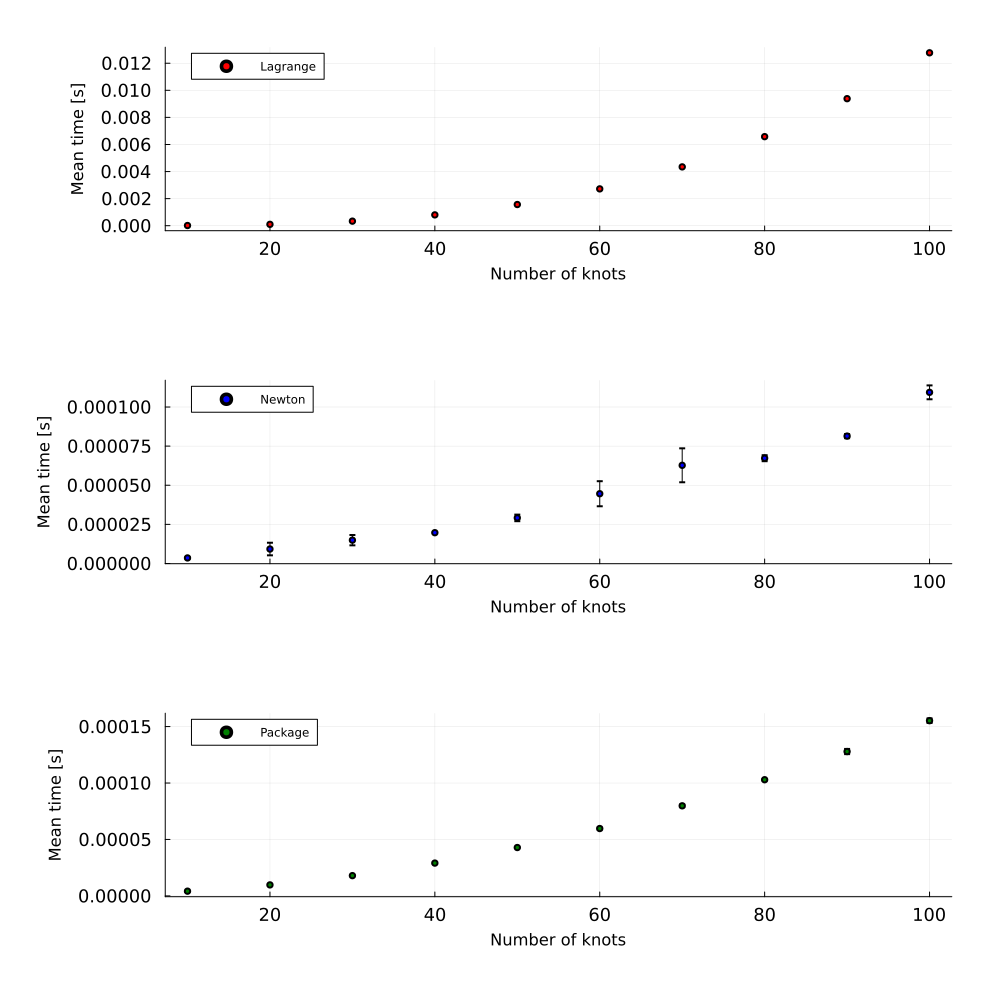

In [93]:
scatter(stats[stats.interpolation .== "l", :].size, size = (1000, 1000), margin = 10mm, xtickfontsize=12, ytickfontsize=12, titlefontsize = 15,
    xlabel = "Number of knots", ylabel = "Mean time [s]", 
    [stats[stats.interpolation .== "l", :].time_mean stats[stats.interpolation .== "n", :].time_mean stats[stats.interpolation .== "p", :].time_mean],
    legend_position = :topleft, label = ["Lagrange" "Newton" "Package"], 
    color = [:red :blue :green],
    yerr = [stats[stats.interpolation .== "l", :].time_std stats[stats.interpolation .== "n", :].time_std stats[stats.interpolation .== "p", :].time_std], 
    layout = grid(3,1), ms = 3
)

### Zadanie 4 - Neville algorithm

Zaimplementować algorytm Neville’a i sprawdzić (dla kilku wybranych punktów), czy daje te same wartości wielomianu co wybrana interpolacja wielomianowa.<b>(1 pkt)</b>

In [104]:
function Neville(xs, ys, x)
    n = length(xs)
    p = zeros(Float64, n, n)

    for i in 1:n
        p[i, i] = ys[i]
    end

    for len in 2:n
        for i in 1:n-len+1
            j = i+len-1
            nominator = (x - xs[i])*p[i+1, j] - (x - xs[j])*p[i, j-1]
            denominator = xs[j] - xs[i]
            p[i, j] = nominator / denominator
        end
    end

    return p[1, n]
end

Neville (generic function with 1 method)

In [111]:
xs = 0:1:10
ys = [rand() for x in xs]
newt = NewtonInterpolation(xs, ys)
test_points = sort(rand(10) * 10)

for x in test_points
    println("x: ", x)
    neville_result = Neville(xs,ys,x)
    newton_result = Newton(newt,xs,x)
    println("Neville: ",neville_result,"  Newton:",newton_result,)
    println("difference = ", abs(neville_result - newton_result))
    println("relative error = ", abs((neville_result - newton_result)/newton_result)*100,"%")
    println()
end    

x: 0.7322798653056117
Neville: 0.15375207768179405  Newton:0.15375207768179389
difference = 1.6653345369377348e-16
relative error = 1.0831297775268573e-13%

x: 0.7329934932736126
Neville: 0.15364593670671065  Newton:0.15364593670671045
difference = 1.942890293094024e-16
relative error = 1.264524356932876e-13%

x: 1.5919029190496692
Neville: 0.05713781618293305  Newton:0.05713781618293298
difference = 6.938893903907228e-17
relative error = 1.2144135648607218e-13%

x: 1.9522945796864244
Neville: 0.20518309273660496  Newton:0.20518309273660496
difference = 0.0
relative error = 0.0%

x: 3.619899774185159
Neville: 0.8882137227424487  Newton:0.8882137227424488
difference = 1.1102230246251565e-16
relative error = 1.249950317359691e-14%

x: 3.637821725537149
Neville: 0.8853046867254066  Newton:0.8853046867254065
difference = 1.1102230246251565e-16
relative error = 1.2540575479518642e-14%

x: 3.9980459252811484
Neville: 0.8054127439799348  Newton:0.8054127439799351
difference = 3.33066907387546

### Zadanie 5 - Spline interpolation

Poeksperymentować z  interpolacją funkcjami sklejanymi (minimum dwie różne funkcje sklejane),  narysować wykresy i porównać z wykresami interpolacji wielomianowej. <b>Zademonstrować  efekt Rungego</b> <b>(1 pkt)</b>. 

#### 1.) 6 knots

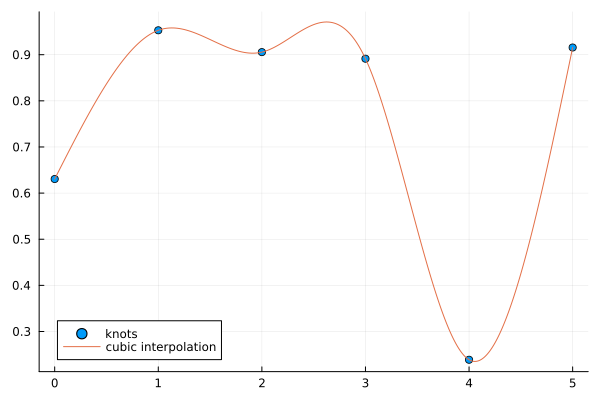

In [115]:
xs = 0:1:5
ys = [rand() for x in xs]
x_test = 0:0.01:5

cubic = CubicSplineInterpolation(xs,ys)
cubic_interpolation = [cubic(x) for x in x_test]
scatter(xs, ys, label="knots")
plot!(x_test,cubic_interpolation, label="cubic interpolation")

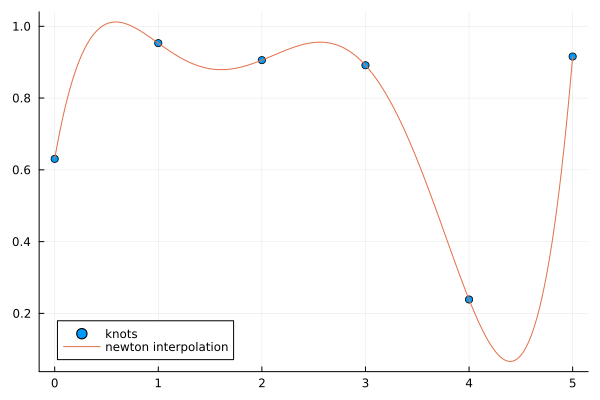

In [116]:
newt = NewtonInterpolation(xs,ys)
newton_interpolation = [Newton(newt,xs,x) for x in x_test]

scatter(xs, ys, label="knots")
plot!(x_test,newton_interpolation, label="newton interpolation")

Zauważmy, że wykresy wielomianów interpolujących oba metodami są dosyć podobne, brak efektu Rungego.

#### 2.) 11 knots

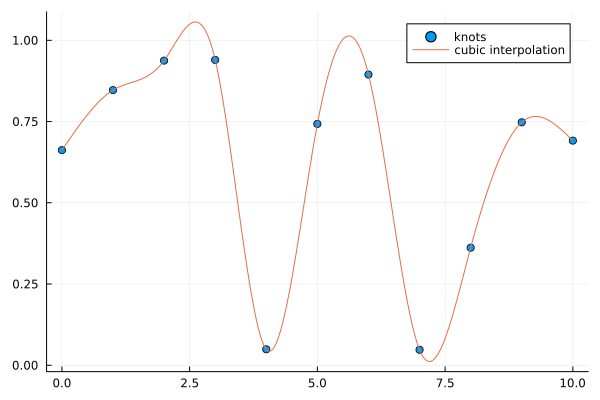

In [117]:
xs = 0:1:10
ys = [rand() for x in xs]
x_test = 0:0.01:10

cubic = CubicSplineInterpolation(xs,ys)
cubic_interpolation = [cubic(x) for x in x_test]
scatter(xs, ys, label="knots")
plot!(x_test,cubic_interpolation, label="cubic interpolation")

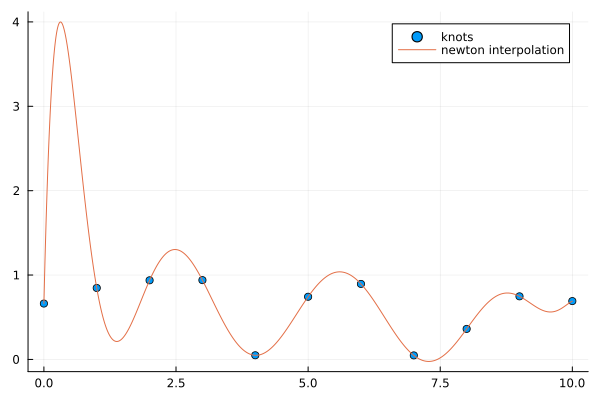

In [118]:
newt = NewtonInterpolation(xs,ys)
newton_interpolation = [Newton(newt,xs,x) for x in x_test]

scatter(xs, ys, label="knots")
plot!(x_test,newton_interpolation, label="newton interpolation")

Natomiast dla 11 węzłów wykresy są wyraźnie inne między niektórymi węzłami. Możemy zaobserwować efekt Rungego. Metoda interpolcji funkcjami sklejanymi jest znacząco dokładniejsza